# Assignment 2

In this assignment the goal is to be able to price a game based on an image. This will be done using a convolutional neural network. In what follows we first performed some ...

To Do:
- Do a round of fine-tuning of the entire model
- Add a base-line
    take the average from the training data and use it on the validation data, we want to improve this with our model


## Train, validation, test split and data pre-processing

The first step requires loading in the images and the json file that includes the price for each game and the corresponding screenshots. <br> <br>


In [1]:
#Load the following packages:
import os
import json
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split

# Set the location of where the images are stored. Adjust if necessary
image_location = '/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment2/images'

# Load the json datafile
file_path = "dataset.json"

# Open the JSON file and load its contents
with open(file_path, 'r') as file:
    data = json.load(file)
data1 = pd.DataFrame(data)



A key aspect of this assignment was accounting for the fact that a game can have multiple images. Therefore, when the training, validation, test split was made, this was done based on the games instead of on the seperate images. For this model the decision was made to split our data 60/20/20. 


In [2]:
# Select 10% of the games
num_selected_games = int(len(data1))
np.random.seed(0) #This is so that we get the same games when training the model.
selected_games = data1.sample(n=num_selected_games)
print(selected_games) # selected 1468 games

         appid     release                           title  price  \
14542  2203540  2023-01-06  Escape From School : F.E.L.I.K    399   
2007   2747740  2024-01-25          Nova Hearts: The Spark      0   
14202  2263550  2023-01-20                 Touch the Color      0   
6681   2562290  2023-09-19                         Penrose    499   
12942  2299920  2023-03-03                      CARTOONITE    499   
...        ...         ...                             ...    ...   
13123  2247930  2023-02-27                Rider of Justice    779   
3264   2621390  2023-12-15                 Whispering Paws    398   
9845   1309990  2023-06-14                    Creature Lab   3939   
10799  2305520  2023-05-11                   Project Drift    199   
2732   2674190  2024-01-04                       Akai Onna    299   

             sentiment reviews percentage  \
14542             None    None        NaN   
2007          Positive      34         82   
14202  Mostly Positive      10      

In [3]:
selected_games['price']

14542     399
2007        0
14202       0
6681      499
12942     499
         ... 
13123     779
3264      398
9845     3939
10799     199
2732      299
Name: price, Length: 14687, dtype: int64

In [4]:
#train_games['screenshots'] = train_games['screenshots'].apply(lambda x: x.split(','))

#max_screenshots = train_games['screenshots'].apply(len).max()


screenshots_new = selected_games['screenshots'].apply(pd.Series)
screenshots_new.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
14542,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_1a1c09618fa769453a86ec361523bb56c87...,2203540_ss_2a7f60e28946eeba3f693cfbbcd911ce86f...,2203540_ss_4bfd302dbed6cf7ea5918f0fc9889a4dfce...,2203540_ss_57481680e8c02e3dc6bc269e5543c36f407...,2203540_ss_612dab69a97e6bc5e9e4e7a53b970248dbb...,2203540_ss_668b84bb5c268642426a986130de57492e6...,2203540_ss_773a259226938c797b7e2702c20a528844b...,2203540_ss_80e1925f5f07f07a88346d7b2bc898da97b...,2203540_ss_bd0722a3320e860f06ee6b275693fc0044a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_391fdbf16da101beb045a88c28e038e0dc3...,2747740_ss_3e21413e0407fc7a35f74faa17273690b10...,2747740_ss_745066e53a1d198e533cde89f6a88de086c...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14202,2263550_ss_003ae84254705fc2976b3302a9a7cad59d3...,2263550_ss_4ba42c4d41d345ce4ad54cdbaac74da3487...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_9e6120400646fc8c47512afd49979b3a92e...,2263550_ss_f62c53d9cd31ca9c6599b9e50a37b86160b...,2263550_ss_fdd57a121c4bbd350261606d180f1a88221...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6681,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_192326a1b1396941cef092ecdf82103a1ba...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_73fefb1fa059409880d1f416508a224dced...,2562290_ss_d8c9e249d251b5fb93f13f818b212074731...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12942,2299920_ss_068a09669ef97ddb9c79c2ca29ef7945dcc...,2299920_ss_0a3f51dc8d1387c051bb0b6239ec3ee2ac2...,2299920_ss_0ac1e97493ca3283d73e36bb9f00115c6d9...,2299920_ss_23e3a1de35a8378e3e2cbddb8cf74b137e1...,2299920_ss_33d9b7158ba8ae1019de2bd2277f147ab00...,2299920_ss_3740347ab51dbaf23e954b25bc860566d8e...,2299920_ss_645d176075ee0ffc545f23adc5e31ca4948...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

# Function to replace NaN values with a random non-NaN value from previous columns
def replace_nan_with_random(df):
    for index, row in df.iterrows():
        for col_index, value in row.items():
            if pd.isnull(value):
                # Get previous non-NaN values in the row
                previous_values = row[:col_index][::-1]
                previous_values = previous_values.dropna()
                
                if not previous_values.empty:
                    # Select a random non-NaN value from previous columns
                    random_value = previous_values.sample().iloc[0]
                    # Replace NaN with the randomly selected value
                    df.at[index, col_index] = random_value

# Call the function to replace NaN values with random non-NaN values
replace_nan_with_random(screenshots_new)

In [6]:
screenshots_new.head()
result_df = pd.concat([selected_games['price'], screenshots_new], axis=1)
result_df.head()

,price,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
14542,399,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_1a1c09618fa769453a86ec361523bb56c87...,2203540_ss_2a7f60e28946eeba3f693cfbbcd911ce86f...,2203540_ss_4bfd302dbed6cf7ea5918f0fc9889a4dfce...,2203540_ss_57481680e8c02e3dc6bc269e5543c36f407...,2203540_ss_612dab69a97e6bc5e9e4e7a53b970248dbb...,2203540_ss_668b84bb5c268642426a986130de57492e6...,2203540_ss_773a259226938c797b7e2702c20a528844b...,2203540_ss_80e1925f5f07f07a88346d7b2bc898da97b...,...,2203540_ss_612dab69a97e6bc5e9e4e7a53b970248dbb...,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_4bfd302dbed6cf7ea5918f0fc9889a4dfce...,2203540_ss_bd0722a3320e860f06ee6b275693fc0044a...,2203540_ss_773a259226938c797b7e2702c20a528844b...,2203540_ss_612dab69a97e6bc5e9e4e7a53b970248dbb...,2203540_ss_c074e9af7bf728eb686ef276e4ec251f95a...,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...
2007,0,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_391fdbf16da101beb045a88c28e038e0dc3...,2747740_ss_3e21413e0407fc7a35f74faa17273690b10...,2747740_ss_745066e53a1d198e533cde89f6a88de086c...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_391fdbf16da101beb045a88c28e038e0dc3...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_391fdbf16da101beb045a88c28e038e0dc3...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...
14202,0,2263550_ss_003ae84254705fc2976b3302a9a7cad59d3...,2263550_ss_4ba42c4d41d345ce4ad54cdbaac74da3487...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_9e6120400646fc8c47512afd49979b3a92e...,2263550_ss_f62c53d9cd31ca9c6599b9e50a37b86160b...,2263550_ss_fdd57a121c4bbd350261606d180f1a88221...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,2263550_ss_fdd57a121c4bbd350261606d180f1a88221...,2263550_ss_fdd57a121c4bbd350261606d180f1a88221...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_9e6120400646fc8c47512afd49979b3a92e...,2263550_ss_f62c53d9cd31ca9c6599b9e50a37b86160b...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_9e6120400646fc8c47512afd49979b3a92e...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_f62c53d9cd31ca9c6599b9e50a37b86160b...
6681,499,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_192326a1b1396941cef092ecdf82103a1ba...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_73fefb1fa059409880d1f416508a224dced...,2562290_ss_d8c9e249d251b5fb93f13f818b212074731...,2562290_ss_73fefb1fa059409880d1f416508a224dced...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_d8c9e249d251b5fb93f13f818b212074731...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...
12942,499,2299920_ss_068a09669ef97ddb9c79c2ca29ef7945dcc...,2299920_ss_0a3f51dc8d1387c051bb

In [7]:
# Split data into training and validation sets based on games
train1_games, test_games = train_test_split(result_df, test_size=0.2, random_state=42)
train_games, val_games = train_test_split(train1_games, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2
#train_games.head()


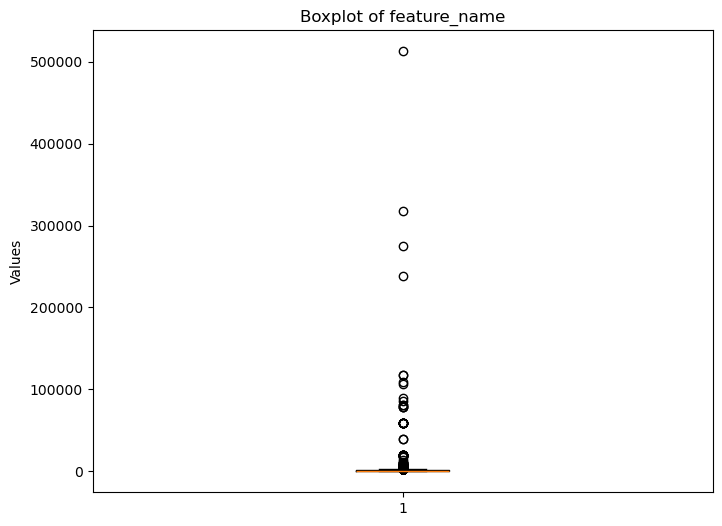

199.0 999.0 800.0


In [8]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'feature_name' is the name of the feature you want to plot
feature_data = train_games['price']

# Create a boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(feature_data)
plt.title('Boxplot of {}'.format('feature_name'))
plt.ylabel('Values')
plt.show()


Q1 = feature_data.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = feature_data.quantile(0.75)
Q4 = feature_data.quantile(0.99)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print(Q1, Q3, IQR)


Very skewed dataset with prices

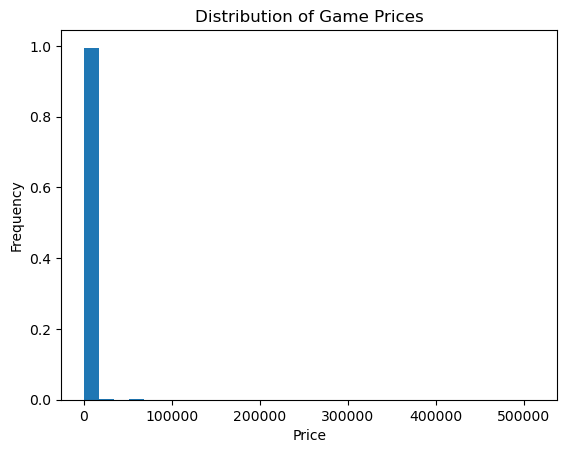

In [9]:
# Plot histogram
#plt.hist(train_games['price'], bins=20, color='skyblue', edgecolor='black', density=True)

# Multiply y-axis values by 100 to represent percentages
plt.hist(train_games['price'], weights=np.zeros_like(train_games['price']) + 1. / train_games['price'].size, bins=30)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Game Prices')

# Show plot
plt.show()

In [10]:
# Exploratory data analysis
print(train_games['price'].describe())


for index, row in train_games.iterrows():
    if row["price"] > 20000:
        print(row["price"])

#There are several games with prices above 300 USD, remove these rows from the training set
# These are part of bundles, after manually checking some of these games.
# Prices under 200 USD are realistic + manual check indicated that these games were correctly priced
train_games = train_games[train_games['price'] <= 20000]
# Removed 16 games
# Verify the changes
print(train_games['price'].describe())

count      8811.000000
mean       1169.925094
std        8531.168263
min           0.000000
25%         199.000000
50%         499.000000
75%         999.000000
max      512850.000000
Name: price, dtype: float64
58500
109175
58500
117000
58500
58450
80600
58500
117000
78000
58500
85800
78000
90000
80600
512850
58500
106100
237867
58500
58450
58450
39000
317700
274950
39000
78000
58500
count     8783.000000
mean       822.408972
std       1228.872497
min          0.000000
25%        199.000000
50%        499.000000
75%        976.000000
max      19499.000000
Name: price, dtype: float64


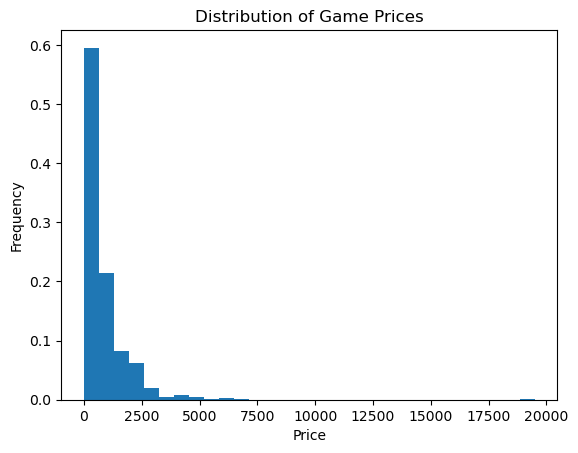

In [11]:
# Plot histogram
#plt.hist(train_games['price'], bins=20, color='skyblue', edgecolor='black', density=True)

# Multiply y-axis values by 100 to represent percentages
plt.hist(train_games['price'], weights=np.zeros_like(train_games['price']) + 1. / train_games['price'].size, bins=30)
# test_games
#train_games
# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Game Prices')

# Show plot
plt.show()

In [12]:


input_imgen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   rotation_range=5.,
                                   horizontal_flip = True)

test_imgen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [13]:


def generate_generator_multiple(generator, batch_size, img_height,img_width):
    genX1 = generator.flow_from_dataframe(dataframe=train_games, directory=image_location, color_mode= "rgb",
                                          target_size = (224,224),
                                          x_col="s_1", y_col="price", has_ext=True, 
                                          class_mode="other",
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    
    genX2 = generator.flow_from_dataframe(dataframe=train_games, directory=image_location, color_mode= "rgb",
                                          target_size = (224,224),
                                          x_col="s_2", y_col="price", has_ext=True, 
                                          class_mode="other",
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            yield [X1i[0], X2i[0]], X2i[1]  #Yield both images and their mutual label



                                              

In [14]:
# trying to extend it to 20 columns
img_height = 224
img_width = 224
batch_size = 16
def generate_generator_multiple(generator, dataframe, batch_size, img_height, img_width, num_columns=7):
    generators = []
    
    for i in range(num_columns):
        genX = generator.flow_from_dataframe(dataframe=dataframe, directory=image_location, color_mode="rgb",
                                             target_size=(img_height, img_width),
                                             x_col=i, y_col="price", has_ext=True,
                                             class_mode="other",
                                             batch_size=batch_size,
                                             shuffle=False,
                                             seed=7)
        generators.append(genX)
       

    while True:
        batch_X = []
        batch_Y = None
        
        for genX in generators:
            X, Y = genX.next()
            batch_X.append(X)
            if batch_Y is None:
                batch_Y = Y
        
        yield batch_X, batch_Y

In [15]:
inputgenerator=generate_generator_multiple(generator=input_imgen, dataframe=train_games,
                                           batch_size=batch_size,
                                           img_height=img_height,
                                           img_width=img_width)       

valgenerator=generate_generator_multiple(test_imgen, dataframe=val_games,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)   
     
testgenerator=generate_generator_multiple(test_imgen, dataframe=test_games,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)    


In [16]:
from tensorflow.keras.layers import Input, Concatenate, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import activations


input_x_1 = Input(shape=(224, 224, 3), name='input_1')
input_x_2 = Input(shape=(224, 224, 3), name='input_2')
input_x_3 = Input(shape=(224, 224, 3), name='input_3')
input_x_4 = Input(shape=(224, 224, 3), name='input_4')
input_x_5 = Input(shape=(224, 224, 3), name='input_5')
input_x_6 = Input(shape=(224, 224, 3), name='input_6')
input_x_7 = Input(shape=(224, 224, 3), name='input_7')

#Shared layer
base_model = VGG16(
    include_top=False, #Do not use the imagenet at the top
    weights="imagenet",
    input_shape= (224, 224, 3),
    pooling=None
)
base_model.trainable = False


x1 = base_model(input_x_1, training=False)
x2 = base_model(input_x_2, training=False)
x3 = base_model(input_x_3, training=False)
x4 = base_model(input_x_4, training=False)
x5 = base_model(input_x_5, training=False)
x6 = base_model(input_x_6, training=False)
x7 = base_model(input_x_7, training=False)


x = Concatenate()([x1, x2, x3, x4, x5, x6, x7])

x = GlobalAveragePooling2D(name="avg_pool")(x)
x = BatchNormalization()(x)
x = Dropout(0.3, name="top_dropout")(x)
output = Dense(1, activation = 'relu', name="prediction")(x)

#other option
#x = layers.Flatten()(vgg16) 
#x = layers.Dense(256, activation='relu')(x)
model = Model(inputs= [input_x_1, input_x_2, input_x_3, input_x_4, input_x_5, input_x_6, input_x_7], outputs= output)


In [17]:
from keras.utils import plot_model
import pydot
#plot_model(model, "multi_input_and_output_model_8 _input.png", show_shapes=True)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                            

In [18]:
# Adding cyclical learning rate
from keras.callbacks import *
from clr_callback import CyclicLR
from keras.optimizers import Adam, SGD

#set the CLR options
clr_step_size = int(4 * (len(train_games)/64)) #see paper https://arxiv.org/pdf/1506.01186
base_lr = 1e-7
max_lr = 1e-2
mode='triangular'


# You are using the triangular learning rate policy and
#  base_lr (initial learning rate which is the lower boundary in the cycle) is 0.1
clr_triangular = CyclicLR(base_lr=base_lr, max_lr=max_lr, step_size=clr_step_size, mode=mode)
opt = Adam(0.0002)

# Adding an early stopping mechanism
EarlyStopping_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=1,
    verbose=1,
    start_from_epoch=0)

model.compile(optimizer=opt, loss='mean_absolute_error', metrics=[keras.metrics.MeanAbsoluteError()])
print("Model is compiled")
# Loss function: the parameter that is used to optimize the model, i.e. the loss function is minimized by the model
# Metric: what is used to evaluate the model performance (this can be used to compare different models)



Model is compiled


In [19]:
steps = len(train_games)//batch_size

# Fitting the model
# fit the model
history = model.fit(
    inputgenerator,
    steps_per_epoch=steps,
    epochs=2,
    validation_data=valgenerator,
    validation_steps = len(val_games)//batch_size, 
    callbacks = [EarlyStopping_cb , clr_triangular]
)


Found 8783 validated image filenames.
Found 8783 validated image filenames.
Found 8783 validated image filenames.
Found 8783 validated image filenames.
Found 8783 validated image filenames.
Found 8783 validated image filenames.
Found 8783 validated image filenames.
Epoch 1/2


2024-05-10 01:43:36.003468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-05-10 01:43:36.009076: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


548/548 [==============================] - ETA: 0s - loss: 673.4579 - mean_absolute_error: 673.4579 Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2937 validated image filenames.
Found 2938 validated image filenames.


/Users/sarahguilliams/anaconda3/lib/python3.11/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="5". These filename(s) will be ignored.
  warnings.warn(
2024-05-10 04:01:46.687387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


548/548 [==============================] - 10963s 20s/step - loss: 673.4579 - mean_absolute_error: 673.4579 - val_loss: 992.8887 - val_mean_absolute_error: 992.8887
Epoch 2/2
548/548 [==============================] - 10858s 20s/step - loss: 603.8967 - mean_absolute_error: 603.8967 - val_loss: 988.5286 - val_mean_absolute_error: 988.5286


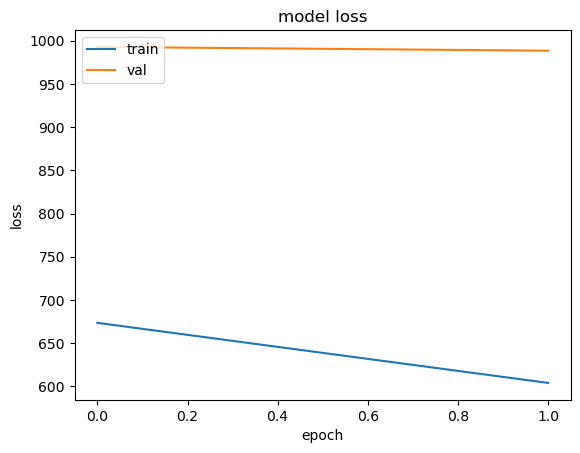

In [20]:
# Plotting the error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
# Evaluate model
loss, mean_absolute_error = model.evaluate(testgenerator, steps=len(test_games)//batch_size)


Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.


2024-05-10 08:13:52.090960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


183/183 [==============================] - 2599s 14s/step - loss: 1263.6124 - mean_absolute_error: 1263.6124


In [75]:
print("Test MAE:", mean_absolute_error)

Test MAE: 1274.9188232421875


In [38]:
test_games['price'].head(20)

5599      589
10799     199
172         0
2282      689
12737     975
1019      975
1555      975
1034       99
9584      779
5878      975
6692       99
2184      589
1093      599
2783       99
10030    1479
12390       0
3708     1999
9983     1479
7027      299
9602      499
Name: price, dtype: int64

In [82]:
pred = []

for i in range(len(test_games.iloc[20])):

    image_paths = [os.path.join(image_location, filename) for filename in test_games.iloc[i, 1:9]]  # Assuming columns "0" to "8" contain the image filenames
    images = [keras.utils.load_img(image_path, target_size=(224, 224)) for image_path in image_paths]

    img_arrays = [keras.utils.img_to_array(img) for img in images]
    img_arrays = [img_array / 255.0 for img_array in img_arrays]
    img_arrays = [tensorflow.expand_dims(img_array, 0) for img_array in img_arrays]  # Create batch axis for each image


    predictions = model.predict(img_arrays)
    price_difference = predictions[0][0] - test_games.iloc[i]['price']
    pred.append({'price': predictions[0][0], 'difference': price_difference})
    print('prediction ', i , predictions[0][0] , 'Difference:', price_difference)

predictions_test = pd.DataFrame(pred)
predictions_test.head()

1/1 [==============================] - 0s 295ms/step
prediction  0 524.22437 Difference: -64.775634765625
1/1 [==============================] - 0s 252ms/step
prediction  1 371.9676 Difference: 172.96759033203125
1/1 [==============================] - 0s 241ms/step
prediction  2 591.05646 Difference: 591.0564575195312
1/1 [==============================] - 0s 292ms/step
prediction  3 508.97314 Difference: -180.02685546875
1/1 [==============================] - 0s 243ms/step
prediction  4 345.76944 Difference: -629.2305603027344
1/1 [==============================] - 0s 247ms/step
prediction  5 536.74554 Difference: -438.25445556640625
1/1 [==============================] - 0s 238ms/step
prediction  6 600.6773 Difference: -374.32269287109375
1/1 [==============================] - 0s 239ms/step
prediction  7 338.7987 Difference: 239.7987060546875
1/1 [==============================] - 0s 237ms/step
prediction  8 150.66516 Difference: -628.3348388671875
1/1 [==============================

,price,difference
0,524.224365,-64.775635
1,371.967590,172.967590
2,591.056458,591.056458
3,508.973145,-180.026855
4,345.769440,-629.230560


In [90]:
test_games['price'].head(86)

5599      589
10799     199
172         0
2282      689
12737     975
         ... 
1188     1179
9234      399
9951      819
3564      499
6533      498
Name: price, Length: 86, dtype: int64

In [83]:
print(min(predictions_test['price']))
print(sum(predictions_test['price'])/ len(predictions_test['price']))
print(max(predictions_test['price']))

-218.28860473632812
468.51888927193573
744.1913452148438


Text(0.5, 0, 'Actual')

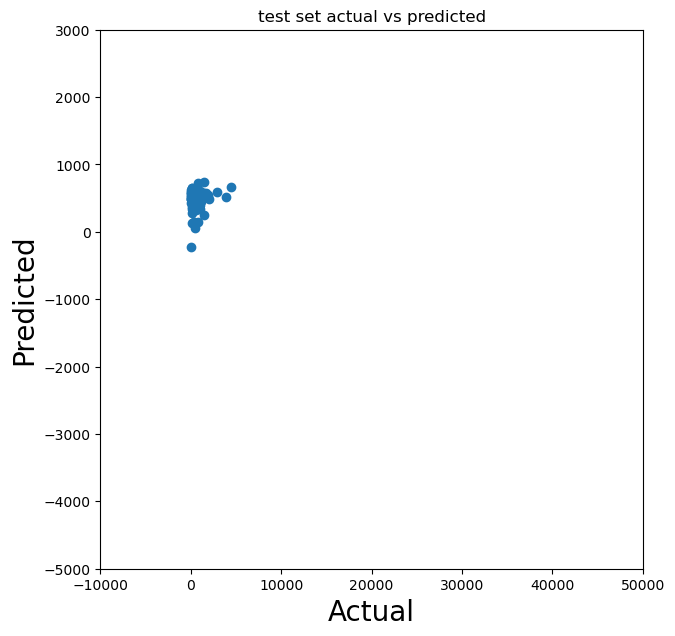

In [91]:
plt.figure(figsize = (7,7))
plt.axis([-10000, 50000, -5000, 3000])
plt.scatter(test_games['price'].head(86), predictions_test['price'])
#plt.plot([min(test_games['price']), max(test_games['price'])], [min(test_games['price']), max(test_games['price'])], color="r", linestyle="-", linewidth=2)
#plt.plot([min(test_games['price']), max(test_games['price'])], [min(test_games['price']), max(test_games['price'])], color="r", linestyle="-", linewidth=2)
plt.title("test set actual vs predicted")
plt.ylabel("Predicted", size=20)
plt.xlabel("Actual", size=20)

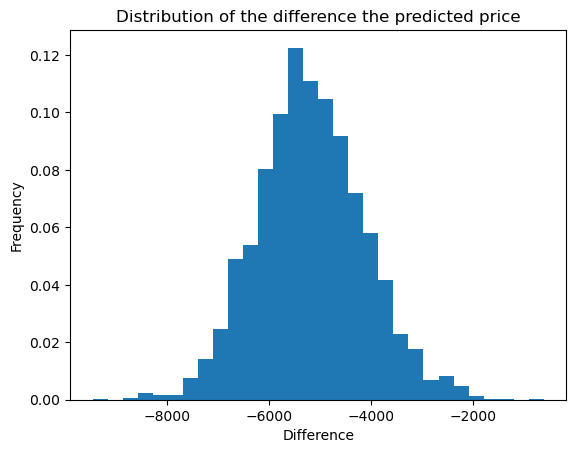

In [74]:

# Multiply y-axis values by 100 to represent percentages
plt.hist(predictions_test['price'], weights=np.zeros_like(predictions_test['price']) + 1. / predictions_test['price'].size, bins=30)
# test_games
#train_games
# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Distribution of the difference the predicted price')

# Show plot
plt.show()

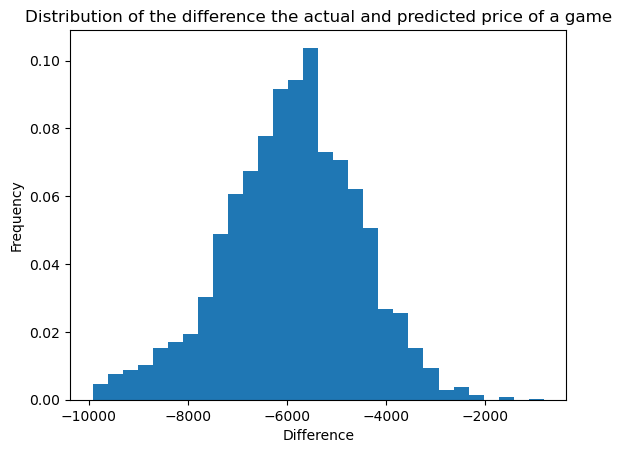

In [75]:
# Plot histogram of the differences in price
predictions_test_no_outliers = predictions_test[predictions_test['difference'] > -10000]
# Multiply y-axis values by 100 to represent percentages
plt.hist(predictions_test_no_outliers['difference'], weights=np.zeros_like(predictions_test_no_outliers['difference']) + 1. / predictions_test_no_outliers['difference'].size, bins=30)
# test_games
#train_games
# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Distribution of the difference the actual and predicted price of a game')

# Show plot
plt.show()

In [56]:
# Assuming `model` is your Keras model containing tensors
# Convert the tensors to NumPy arrays
model_weights = [layer.numpy() for layer in model.weights]
tensorflow.keras.models.save_model(model, "my_model_multiple_images8.h5")

In [45]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                          

Give the predicted price for a game


2703240_ss_b09a37f8a0d9a8a1844fc018826f276cb50c58a3.1920x1080.jpg


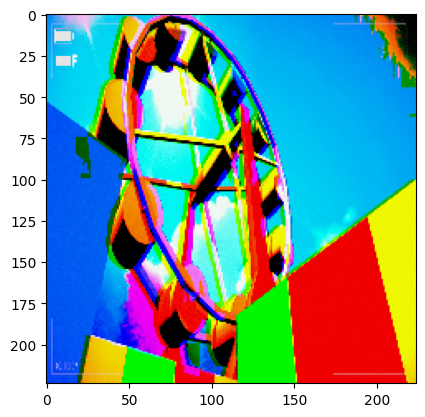

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[534.8773]]
58500


In [95]:
# Define the image location
number = 100
print(test_label_df.loc[number, "screenshot"])
filename = test_label_df.loc[number, "screenshot"]
#'620620_ss_01fe128c1e30f3cc9cee30fa4bbdb7f60e9abe67.1920x1080.jpg'

# Construct the full path to the image
image_path = os.path.join(image_location, filename)

# Load and display the image
img = keras.utils.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
print(test_label_df.loc[number, "price"])




_________________________________________________________________________________________________________________________